<a href="https://colab.research.google.com/github/DevilbissLab/ManuscriptAnalyses/blob/main/run_Cellpose_SAM(DMD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DMD Version of CellPose workflow
- Single Click Version

https://www.cellpose.org/

https://github.com/MouseLand/cellpose/blob/main/notebooks/run_Cellpose-SAM.ipynb

Make sure you have GPU access enabled by going to Runtime -> Change Runtime Type -> Hardware accelerator and selecting GPU

In [ ]:
# *** SET the channels you want to analyze ***
first_channel = '1' # @param ['None', 0, 1, 2, 3, 4, 5]
second_channel = 'None' # @param ['None', 0, 1, 2, 3, 4, 5]
third_channel = 'None' # @param ['None', 0, 1, 2, 3, 4, 5]

In [ ]:
# *** SET your image extension ***
image_ext = ".tif"

# *** Set your google drive folder path ***
dir = "/gdrive/MyDrive/My Raw Data/Rowan Data Drive/Keyance Images/Project - mTBI cMet/MDCK Cell Plates/Dihexa1000 Colonies"

# ** Other Parameters **
masks_ext = ".png" if image_ext == ".png" else ".tif"
flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

In [ ]:
# Run Cellpose-SAM on folder of images
# if you have many large images, you may want to run them as a loop over images
#
#
# prompt: access google drive
from google.colab import drive
try:
  drive.mount('/gdrive')
except Exception as e:
  drive.mount('/gdrive', force_remount=True)
  print(f"Failed to mount: {file_path}. Error: {e}")

!ls "/gdrive/My Drive/"

# install cellpose in enviroment
!pip install git+https://www.github.com/mouseland/cellpose.git
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  #raise ImportError("No GPU access, change your runtime")
  model = models.CellposeModel(gpu=False)
else:
  model = models.CellposeModel(gpu=True)

# Start --
dir = Path(dir)
if not dir.exists():
  raise FileNotFoundError("directory does not exist")

# list all files
files = natsorted([f for f in dir.glob("*"+image_ext) if "_masks" not in f.name and "_flows" not in f.name])

if(len(files)==0):
  raise FileNotFoundError("no image files found, did you specify the correct folder and extension?")
else:
  print(f"{len(files)} images in folder:")

for i in trange(len(files)):
  f = files[i]
  print(f.name)

  #Load image
  img = io.imread(f)
  print(f'your image has shape: {img.shape}. Assuming channel dimension is last with {img.shape[-1]} channels')

  # Process Channels
  selected_channels = []
  for i, c in enumerate([first_channel, second_channel, third_channel]):
    if c == 'None':
      continue
    if int(c) > img.shape[-1]:
      assert False, 'invalid channel index, must have index greater or equal to the number of channels'
    if c != 'None':
      selected_channels.append(int(c))

  img_selected_channels = np.zeros_like(img)
  img_selected_channels[:, :, :len(selected_channels)] = img[:, :, selected_channels]

  masks, flows, styles = model.eval(img_selected_channels, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

  print("saving masks")
  masks0 = io.imsave(dir / (f.name + "_masks" + masks_ext), masks)
  io.save_rois(masks, f)

  #fig = plt.figure(figsize=(12,5))
  #plot.show_segmentation(fig, img_selected_channels, masks, flows[0])
  #plt.tight_layout()
  #plt.show()

#then Drag this .zip file into ImageJ

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
 20241030_125918.jpg
'2025 WCBR cMET Poster 1-20-2025 (Final).pdf'
'Colab Notebooks'
'Google Colab Notebooks'
'IACUC 2022 Website Pages tasks.gsheet'
 LabMember_Projects
 Laboratory_Management
'My Backups'
'My Raw Data'
'My Software'
 NexStepBiomarkers
 NexStepBiomarkers-GoogleDrive
 NNS2025.pdf
'Personal Documents'
'Program Enhancements.gsheet'
 Public_Share
'Rowan University'
'Rowan University GSBS'
'SOM-StSomCBRes Departmental Drive'
 temp
'Winter Conference on Brain Research'
  Cloning https://www.github.com/mouseland/cellpose.git to /tmp/pip-req-build-guo6kqa2
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /tmp/pip-req-build-guo6kqa2
  Resolved https://www.github.com/mouseland/cellpose.git to commit d95f58a6676362d4e625076e55cd73b47c3bae26
  Preparing metadata (setup.py) ... done
2025-08-17 23:13:07,571 [INFO] WRIT

  0%|          | 0/23 [00:00<?, ?it/s]

Dihexa1000-1.tif
your image has shape: (172, 131, 3). Assuming channel dimension is last with 3 channels


  4%|▍         | 1/23 [00:01<00:30,  1.37s/it]

saving masks
Dihexa1000-2.tif
your image has shape: (186, 225, 3). Assuming channel dimension is last with 3 channels


  9%|▊         | 2/23 [00:02<00:27,  1.30s/it]

saving masks
Dihexa1000-3.tif
your image has shape: (105, 148, 3). Assuming channel dimension is last with 3 channels


 13%|█▎        | 3/23 [00:04<00:27,  1.37s/it]

saving masks
Dihexa1000-4.tif
your image has shape: (84, 105, 3). Assuming channel dimension is last with 3 channels


 17%|█▋        | 4/23 [00:05<00:25,  1.33s/it]

saving masks
Dihexa1000-5.tif
your image has shape: (93, 119, 3). Assuming channel dimension is last with 3 channels


 22%|██▏       | 5/23 [00:06<00:23,  1.30s/it]

saving masks
Dihexa1000-6.tif
your image has shape: (131, 152, 3). Assuming channel dimension is last with 3 channels


 26%|██▌       | 6/23 [00:07<00:22,  1.31s/it]

saving masks
Dihexa1000-7.tif
your image has shape: (94, 96, 3). Assuming channel dimension is last with 3 channels


 30%|███       | 7/23 [00:09<00:20,  1.29s/it]

saving masks
Dihexa1000-8.tif
your image has shape: (105, 136, 3). Assuming channel dimension is last with 3 channels


 35%|███▍      | 8/23 [00:10<00:19,  1.29s/it]

saving masks
Dihexa1000-9.tif
your image has shape: (137, 128, 3). Assuming channel dimension is last with 3 channels


 39%|███▉      | 9/23 [00:11<00:17,  1.28s/it]

saving masks
Dihexa1000-10.tif
your image has shape: (173, 167, 3). Assuming channel dimension is last with 3 channels


 43%|████▎     | 10/23 [00:12<00:16,  1.27s/it]

saving masks
Dihexa1000-11.tif
your image has shape: (124, 153, 3). Assuming channel dimension is last with 3 channels


 48%|████▊     | 11/23 [00:14<00:15,  1.26s/it]

saving masks
Dihexa1000-12.tif
your image has shape: (89, 89, 3). Assuming channel dimension is last with 3 channels


 52%|█████▏    | 12/23 [00:15<00:14,  1.28s/it]

saving masks
Dihexa1000-13.tif
your image has shape: (76, 142, 3). Assuming channel dimension is last with 3 channels


 57%|█████▋    | 13/23 [00:16<00:12,  1.27s/it]

saving masks
Dihexa1000-14.tif
your image has shape: (108, 153, 3). Assuming channel dimension is last with 3 channels


 61%|██████    | 14/23 [00:18<00:11,  1.26s/it]

saving masks
Dihexa1000-15.tif
your image has shape: (180, 173, 3). Assuming channel dimension is last with 3 channels


 65%|██████▌   | 15/23 [00:19<00:09,  1.24s/it]

saving masks
Dihexa1000-16.tif
your image has shape: (149, 176, 3). Assuming channel dimension is last with 3 channels


 70%|██████▉   | 16/23 [00:20<00:08,  1.27s/it]

saving masks
Dihexa1000-17.tif
your image has shape: (136, 174, 3). Assuming channel dimension is last with 3 channels


 74%|███████▍  | 17/23 [00:21<00:07,  1.26s/it]

saving masks
Dihexa1000-18.tif
your image has shape: (249, 180, 3). Assuming channel dimension is last with 3 channels


 78%|███████▊  | 18/23 [00:23<00:06,  1.35s/it]

saving masks
Dihexa1000-19.tif
your image has shape: (250, 193, 3). Assuming channel dimension is last with 3 channels


 83%|████████▎ | 19/23 [00:24<00:05,  1.42s/it]

saving masks
Dihexa1000-20.tif
your image has shape: (104, 89, 3). Assuming channel dimension is last with 3 channels


 87%|████████▋ | 20/23 [00:26<00:04,  1.35s/it]

saving masks
Dihexa1000-21.tif
your image has shape: (248, 211, 3). Assuming channel dimension is last with 3 channels


 91%|█████████▏| 21/23 [00:27<00:02,  1.41s/it]

saving masks
Dihexa1000-22.tif
your image has shape: (157, 160, 3). Assuming channel dimension is last with 3 channels


 96%|█████████▌| 22/23 [00:28<00:01,  1.37s/it]

saving masks
Dihexa1000-23.tif
your image has shape: (162, 187, 3). Assuming channel dimension is last with 3 channels


100%|██████████| 23/23 [00:30<00:00,  1.31s/it]

saving masks


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
 20241030_125918.jpg
'2025 WCBR cMET Poster 1-20-2025 (Final).pdf'
'Colab Notebooks'
'Google Colab Notebooks'
'IACUC 2022 Website Pages tasks.gsheet'
 LabMember_Projects
 Laboratory_Management
'My Backups'
'My Raw Data'
'My Software'
 NexStepBiomarkers
 NexStepBiomarkers-GoogleDrive
 NNS2025.pdf
'Personal Documents'
'Program Enhancements.gsheet'
 Public_Share
'Rowan University'
'Rowan University GSBS'
'SOM-StSomCBRes Departmental Drive'
 temp
'Winter Conference on Brain Research'
  Cloning https://www.github.com/mouseland/cellpose.git to /tmp/pip-req-build-fbh38r7c
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /tmp/pip-req-build-fbh38r7c
  Resolved https://www.github.com/mouseland/cellpose.git to commit d95f58a6676362d4e625076e55cd73b47c3bae26
  Preparing metadata (setup.py) ... done
2025-08-17 18:28:53,163 [INFO] WRIT

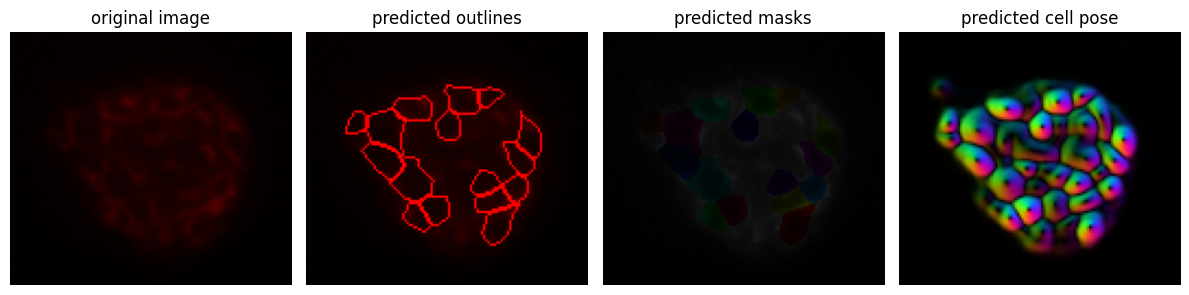

saving masks


In [ ]:
# Run Cellpose-SAM on a single (1st Image) for testing
# if you have many large images, you may want to run them as a loop over images
#
#
# prompt: access google drive
from google.colab import drive
try:
  drive.mount('/gdrive')
except Exception as e:
  drive.mount('/gdrive', force_remount=True)
  print(f"Failed to mount: {file_path}. Error: {e}")

!ls "/gdrive/My Drive/"

# install cellpose in enviroment
!pip install git+https://www.github.com/mouseland/cellpose.git
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  #raise ImportError("No GPU access, change your runtime")
  model = models.CellposeModel(gpu=False)
else:
  model = models.CellposeModel(gpu=True)

# Start --
masks_ext = ".png" if image_ext == ".png" else ".tif"
dir = Path(dir)
if not dir.exists():
  raise FileNotFoundError("directory does not exist")

# list all files
files = natsorted([f for f in dir.glob("*"+image_ext) if "_masks" not in f.name and "_flows" not in f.name])

if(len(files)==0):
  raise FileNotFoundError("no image files found, did you specify the correct folder and extension?")
else:
  print(f"{len(files)} images in folder:")

for f in files:
  print(f.name)

# Run Cellpose-SAM on one image in folder << ONLY analyze 1st image <<<<
img = io.imread(files[0])
print(f'your image has shape: {img.shape}. Assuming channel dimension is last with {img.shape[-1]} channels')

# Process Channels
selected_channels = []
for i, c in enumerate([first_channel, second_channel, third_channel]):
  if c == 'None':
    continue
  if int(c) > img.shape[-1]:
    assert False, 'invalid channel index, must have index greater or equal to the number of channels'
  if c != 'None':
    selected_channels.append(int(c))

img_selected_channels = np.zeros_like(img)
img_selected_channels[:, :, :len(selected_channels)] = img[:, :, selected_channels]

flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

masks, flows, styles = model.eval(img_selected_channels, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img_selected_channels, masks, flows[0])
plt.tight_layout()
plt.show()

# to save your masks for ImageJ, run the following code:
masks_ext = ".png" if image_ext == ".png" else ".tif"
print("saving masks")

f = files[0]
masks0 = io.imsave(dir / (f.name + "_masks" + masks_ext), masks)
io.save_rois(masks, f)

#then Drag this .zip file into ImageJ

In [ ]:
# Example Snipit
# if you have small images, you may want to load all of them first and then run, so that they can be batched together on the GPU
print("loading images")
imgs = [io.imread(files[i]) for i in trange(len(files))]

print("running cellpose-SAM")
masks, flows, styles = model.eval(imgs, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

print("saving masks")
for i in trange(len(files)):
    f = files[i]
    io.imsave(dir / (f.stem + "_masks" + masks_ext), masks[i])